<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Реализация-алгоритма-преобразования" data-toc-modified-id="Реализация-алгоритма-преобразования-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Реализация алгоритма преобразования</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

### Описание данных <a class="tocSkip">

<div style="border:solid green 5px; padding: 16px; border-radius: 10px"> 
<br>Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
<br>Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("/datasets/insurance.csv")

In [3]:
df.head() # Загрузим данные

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.info(memory_usage='deep') #Выведем информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.isna().mean() # Посмотрим пропущенные значения

Пол                  0.0
Возраст              0.0
Зарплата             0.0
Члены семьи          0.0
Страховые выплаты    0.0
dtype: float64

In [6]:
df.describe().T # выведем стат данные

,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


In [7]:
df.duplicated().sum() # Проверим количество дубликатов

153

In [8]:
df[df.duplicated()].head() #Выведем первые 5 дубликатов на экран

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0


In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

0

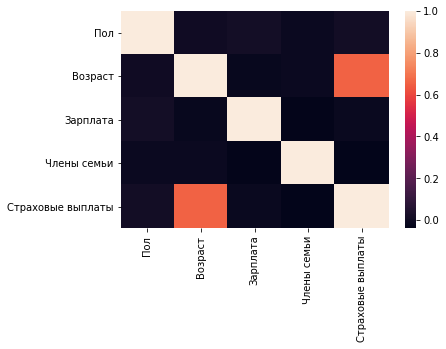

In [11]:
sns.heatmap(df.corr());

### Вывод

В таблице 5 колонок и 5000 строк. Типы данных соответствуют условиям, пропусков нет. Выявили 153 дубликата, на мой взгляд нет необходимости их удалять. Во-первых, это менее 3% от всех данных, а, во-вторых, это не повлияет на результат исследования.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Пусть P обратимая квадратная матрица, размер которой равен ширине Х, тогда:
$$ X'=XP $$

Преобразуем формулу:


$$ w' = ((XP)^T XP)^{-1} (XP)^T y =$$
$$  = (P^T (X^T X) P)^{-1} P^T X^T y =$$
$$  = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y =$$


$$  = P^{-1} (X^T X)^{-1} X^T y =$$
$$  = P^{-1} w =$$

Тогда:

$$  a' = X'P^{-1}w= ХPP^{-1}w=Xw= a $$

In [12]:
# Готовим целевой признак и признаки
features=df.drop(['Страховые выплаты'],axis=1)
target=df['Страховые выплаты']

In [13]:
print(features.shape)
print(target.shape)

(4847, 4)
(4847,)


In [27]:
# Формирую случайными равномерно распределнными значениями обратимую матрицу 4х4
rand_matrix=np.random.normal(size=(features.shape[1],features.shape[1]))
rand_matrix.shape

(4, 4)

In [28]:
rand_matrix 

array([[ 0.37337843, -2.83052191,  1.06673899,  0.58519173],
       [-0.19387098,  0.79709834, -1.24721541, -1.25474598],
       [-0.75259556,  0.52868859,  1.0450657 , -0.54743914],
       [ 1.02414075, -0.08529785, -2.23301932, -1.3149847 ]])

In [29]:
# Проверка матрицы на обратимость. В случае, если матрица не обратима - функция выдаст ошибку.
P_inv=np.linalg.inv(rand_matrix)
P_inv

array([[-0.47672727, -2.20016423,  1.00201632,  1.47007598],
       [-0.49009546, -0.66456032,  0.31545486,  0.28468943],
       [-0.14459392, -1.12369422,  1.01451442,  0.58552069],
       [-0.09395601,  0.23775077, -0.96284935, -0.62829452]])

In [30]:
# Новая кодированная матрица 
crypt_features=features.dot(rand_matrix)
print(crypt_features.head(10))
print(crypt_features.shape)

              0             1             2             3
0 -37335.290852  26252.719468  51782.956809 -27205.155616
1 -28606.525116  20126.747793  39652.891826 -20861.720538
2 -15810.128970  11125.576323  21910.210538 -11532.609528
3 -31385.257764  22062.882834  43548.582296 -22857.191683
4 -19647.799065  13818.260532  27242.359583 -14322.709194
5 -30862.332657  21707.506460  42790.664304 -22501.003507
6 -29883.182948  21017.022894  41437.067750 -21784.313644
7 -29050.565360  20424.135468  40300.490453 -21167.194118
8 -37409.581053  26301.602836  51893.699456 -27253.625799
9 -38913.996684  27355.791630  53988.819726 -28343.485091
(4847, 4)


In [18]:
# пример матрицы признаков X
features.head(10)

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0
5,1,43.0,41000.0,2
6,1,39.0,39700.0,2
7,1,25.0,38600.0,4
8,1,36.0,49700.0,1
9,1,32.0,51700.0,1


### Вывод

Умножая значения одних и тех же весов на признаки разных матриц мы получим значения отличные друг от друга

**Ответ:** при умножении признаков $X$ на обратимую матрицу $P$  мы имеем новую матрицу признаков $B$. Качество линейной регрессии после проверки $B$  измениться, т.е метрика качества $R^2$ будет сильно другой. А точнее будет хуже. Но если принять матрицу признаков $B$, как обучающую, то модель обучится и покажет тот же результат $R^2$, что и для признаков $X$.

**Обоснование:** в нашей задаче мы предсказываем целевой признак: $$y=W1*X1+W2*X2...Wn*Xn+W0$$ где n-количество признаков. А если мы подставим вместо значений $X$ значения новой матрицы $B$, то получим значения новых предсказаний $y':y'=W1*B1+W2*B2...Wn*Bn+W0$, и при старых весах  $W$ значения $y!=y'$. Для того чтобы получить $y=y'$ надо получить новые веса $W'$, т.е обучить матрицу признаков $B$ заново!

## Алгоритм преобразования

**Алгоритм**

После получения новой матрицы $B$, перед процессом функцией predict выполним действие: $$X = P^{-1}*B$$

**Обоснование**

Кодирование признаков происходит умножением $X*P=B$, где $X$ -матрица признаков, $P$-матрица, на которую умножаются признаки (обратимая матрица),$B$-новая матрица. Умножим обе части уравнения на $Р^{-1}$ (обратную матрицу $P$). Получим $X*P^{-1}*P=B*P^{-1}$. Зная свойство обратных матриц $P^{-1}*P=E$, где $Е$- это единичная матрица и зная свойство единичной матрицы $E*X=X$, получаем $X=P^{-1}*B$

## Проверка алгоритма

In [19]:
# Класс модели линейной регрессии
class LineRegression():
    #Функция обучения
    def fit(self,train_features,train_target):
       
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1) # Добавляем столбец с 1
        y=train_target 
        w=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # сама формула ЛР
       
        self.w=w[1:] # веса признаков
        self.w0=w[0] # регрессор константа
    
    #Функция предсказания    
    def predict(self,test_features):
        return test_features.dot(self.w)+self.w0 # признак 

In [20]:
# Модель линейной регрессии для features без кодирования
model=LineRegression()
model.fit(features,target)
prediction=model.predict(features)

MSE=r2_score(target,prediction)
print(MSE)

0.4302010044852067


In [21]:
# Модель линейной регрессии для crypt_features (кодированная) без обучения 
model=LineRegression()
model.fit(features,target)
prediction_crypt_1=model.predict(crypt_features)
MSE_crypt_1=r2_score(target,prediction_crypt_1)
print(MSE_crypt_1)

-934641.6461218816


In [22]:
# Модель линейной регрессии для crypt_features (кодированная) с обучением 
model=LineRegression()
model.fit(crypt_features,target)
prediction_crypt_2=model.predict(crypt_features)
MSE_crypt_2=r2_score(target,prediction_crypt_2)
print(MSE_crypt_2)

0.4302010044852098


### Реализация алгоритма преобразования

In [31]:
E_matrix=rand_matrix.dot(P_inv) # проверяем, что при умножении P на P^{-1} будет единичная матрица
E_matrix

array([[ 1.00000000e+00,  1.55698811e-16, -6.82768729e-17,
         9.68666103e-18],
       [-1.86958764e-17,  1.00000000e+00, -4.86929768e-17,
         2.08887538e-17],
       [ 3.14236463e-17,  1.80427911e-16,  1.00000000e+00,
        -2.47280577e-16],
       [-1.56624350e-17, -1.73854798e-16,  3.11881003e-16,
         1.00000000e+00]])

In [24]:
decrypt_features=crypt_features.dot(P_inv) # сам алгоритм преобразования

In [25]:
model=LineRegression()
model.fit(features,target)
prediction_decrypt=model.predict(decrypt_features)
MSE_decrypt=r2_score(target,prediction_decrypt)
print(MSE_decrypt)

0.4302010044852216


In [26]:
rezume=[MSE,MSE_crypt_1,MSE_crypt_2,MSE_decrypt]
df_rezume=pd.DataFrame(rezume,index=['Без кодирования','С кодированием и без переобучения','С кодированием и переобучением','С преобразованием'])
df_rezume.set_axis(['MSE'],axis='columns',inplace=True)
df_rezume

,MSE
Без кодирования,0.430201
С кодированием и без переобучения,-934641.646122
С кодированием и переобучением,0.430201
С преобразованием,0.430201


### Вывод

Модели "Без кодирования","С кодированием и переобучением" и "С преобразованием " дали одинаковый результат. Алгоритм преобразования работает!

## Общий вывод

<div style="border:solid green 5px; padding: 20px">
    
**<font color="green">Загрузка данных</font>**    
<br>В таблице 5 колонок и 5000 строк. Типы данных соответствуют условиям, пропусков нет. Выявили 153 дубликата, решили их не удалять. Во-первых, это менее 3% от всех данных, а, во-вторых, это не повлияет на результат исследования.
    
**<font color="green">Умножение матриц</font>**   
<br>Умножая значения одних и тех же весов на признаки разных матриц мы получим значения отличные друг от друга
    
**<font color="green">Проверка алгоритма</font>**   
<br>Модели "Без кодирования","С кодированием и переобучением" и "С преобразованием " дали одинаковый результат. Алгоритм преобразования работает!